In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

import matplotlib.cm as cm
from IPython.display import Image, display

import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import tensorflow.keras.backend as K

2023-05-04 10:40:48.612434: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 10:40:48.636520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 10:40:49.060001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


2023-05-04 10:40:49.696166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 10:40:49.713870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 10:40:49.713967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
base_dir = '/home/mbzirc/Desktop/classification_model/different_defects_datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary') # Because you use binary_crossentropy loss, you need binary

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), # <-- The missing comma was added here
    batch_size=20,
    class_mode='binary')


Found 2764 images belonging to 2 classes.
Found 789 images belonging to 2 classes.


In [4]:
inputs = tf.keras.Input(shape=(150, 150, 3))

x = keras.applications.VGG16(input_tensor=inputs,
                               include_top=False,
                               weights=None)
x.trainable = False
x = layers.Flatten()(x.output)
x = layers.Dense(128, activation='relu', input_dim=4 * 4 * 512)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, x)
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

2023-05-04 10:40:52.242295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 10:40:52.242410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 10:40:52.242463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
model.summary()

#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output_shape, layer.trainable)

0 input_1 [(None, 150, 150, 3)] False
1 block1_conv1 (None, 150, 150, 64) False
2 block1_conv2 (None, 150, 150, 64) False
3 block1_pool (None, 75, 75, 64) False
4 block2_conv1 (None, 75, 75, 128) False
5 block2_conv2 (None, 75, 75, 128) False
6 block2_pool (None, 37, 37, 128) False
7 block3_conv1 (None, 37, 37, 256) False
8 block3_conv2 (None, 37, 37, 256) False
9 block3_conv3 (None, 37, 37, 256) False
10 block3_pool (None, 18, 18, 256) False
11 block4_conv1 (None, 18, 18, 512) False
12 block4_conv2 (None, 18, 18, 512) False
13 block4_conv3 (None, 18, 18, 512) False
14 block4_pool (None, 9, 9, 512) False
15 block5_conv1 (None, 9, 9, 512) False
16 block5_conv2 (None, 9, 9, 512) False
17 block5_conv3 (None, 9, 9, 512) False
18 block5_pool (None, 4, 4, 512) False
19 flatten (None, 8192) True
20 dense (None, 128) True
21 dropout (None, 128) True
22 dense_1 (None, 1) True


In [7]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator)

Epoch 1/5


/tmp/ipykernel_70819/2772995369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-05-04 10:40:53.811080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-04 10:40:54.728220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-05-04 10:40:55.193395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-04 10:40:55.195904: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55ca7eaeaef0 initialized for platform CUDA (this does not guarantee t

137/139 [============================>.] - ETA: 0s - loss: 0.6931 - acc: 0.5228

2023-05-04 10:40:57.849707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


139/139 [==============================] - 5s 23ms/step - loss: 0.6931 - acc: 0.5246 - val_loss: 0.6930 - val_acc: 0.5247
Epoch 2/5
139/139 [==============================] - 3s 22ms/step - loss: 0.6929 - acc: 0.5246 - val_loss: 0.6929 - val_acc: 0.5247
Epoch 3/5
139/139 [==============================] - 3s 22ms/step - loss: 0.6927 - acc: 0.5246 - val_loss: 0.6927 - val_acc: 0.5247
Epoch 4/5
139/139 [==============================] - 3s 22ms/step - loss: 0.6927 - acc: 0.5246 - val_loss: 0.6926 - val_acc: 0.5247
Epoch 5/5
139/139 [==============================] - 3s 22ms/step - loss: 0.6926 - acc: 0.5246 - val_loss: 0.6926 - val_acc: 0.5247


In [8]:
model.trainable = True
set_trainable = False
for layer in model.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output_shape, ', Training Status: ', layer.trainable)

0 input_1 [(None, 150, 150, 3)] , Training Status:  False
1 block1_conv1 (None, 150, 150, 64) , Training Status:  False
2 block1_conv2 (None, 150, 150, 64) , Training Status:  False
3 block1_pool (None, 75, 75, 64) , Training Status:  False
4 block2_conv1 (None, 75, 75, 128) , Training Status:  False
5 block2_conv2 (None, 75, 75, 128) , Training Status:  False
6 block2_pool (None, 37, 37, 128) , Training Status:  False
7 block3_conv1 (None, 37, 37, 256) , Training Status:  True
8 block3_conv2 (None, 37, 37, 256) , Training Status:  True
9 block3_conv3 (None, 37, 37, 256) , Training Status:  True
10 block3_pool (None, 18, 18, 256) , Training Status:  True
11 block4_conv1 (None, 18, 18, 512) , Training Status:  True
12 block4_conv2 (None, 18, 18, 512) , Training Status:  True
13 block4_conv3 (None, 18, 18, 512) , Training Status:  True
14 block4_pool (None, 9, 9, 512) , Training Status:  True
15 block5_conv1 (None, 9, 9, 512) , Training Status:  True
16 block5_conv2 (None, 9, 9, 512) , T

In [10]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])
    
history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=validation_generator)

Epoch 1/100


/tmp/ipykernel_70819/1291202677.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-05-04 10:41:11.051569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


138/139 [============================>.] - ETA: 0s - loss: 0.6924 - acc: 0.5237

2023-05-04 10:41:16.974064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


139/139 [==============================] - 7s 34ms/step - loss: 0.6923 - acc: 0.5246 - val_loss: 0.6918 - val_acc: 0.5247
Epoch 2/100
139/139 [==============================] - 4s 32ms/step - loss: 0.6920 - acc: 0.5246 - val_loss: 0.6916 - val_acc: 0.5247
Epoch 3/100
139/139 [==============================] - 4s 31ms/step - loss: 0.6919 - acc: 0.5246 - val_loss: 0.6922 - val_acc: 0.5247
Epoch 4/100
139/139 [==============================] - 4s 31ms/step - loss: 0.6921 - acc: 0.5246 - val_loss: 0.6918 - val_acc: 0.5247
Epoch 5/100
139/139 [==============================] - 4s 31ms/step - loss: 0.6920 - acc: 0.5246 - val_loss: 0.6916 - val_acc: 0.5247
Epoch 6/100
139/139 [==============================] - 5s 32ms/step - loss: 0.6919 - acc: 0.5246 - val_loss: 0.6915 - val_acc: 0.5247
Epoch 7/100
139/139 [==============================] - 4s 32ms/step - loss: 0.6918 - acc: 0.5246 - val_loss: 0.6916 - val_acc: 0.5247
Epoch 8/100
139/139 [==============================] - 4s 32ms/step - loss

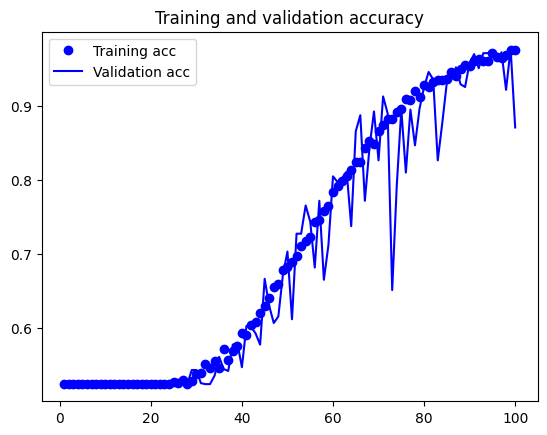

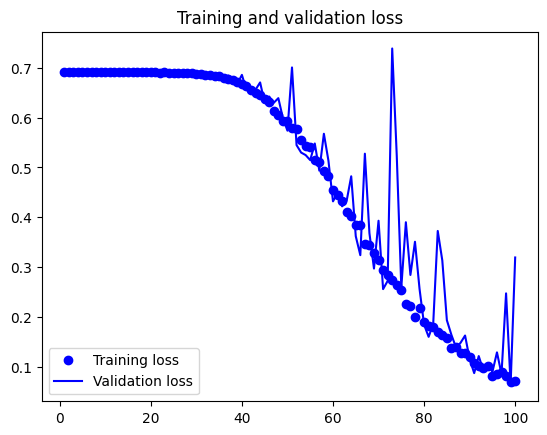

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
    
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 397 images belonging to 2 classes.


/tmp/ipykernel_70819/1120264915.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
2023-05-04 10:49:00.281223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


test acc: 0.8816120624542236


In [13]:
train_generator.class_indices

{'defective': 0, 'nondefective': 1}

In [13]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")

## Defect Segmentation Using Color Filters

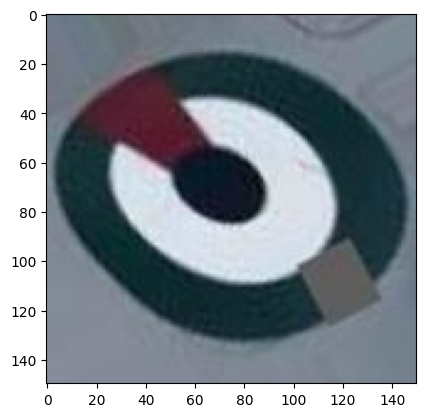

In [14]:
import matplotlib.pyplot as plt

logo = '/home/mbzirc/Desktop/classification_model/different_defects_datasets/test/defective/IMG_115_6833.jpeg'
DIM = 150

img = load_img(logo, target_size=(DIM, DIM))

plt.imshow(img)

In [15]:
import cv2

In [16]:
# define the list of boundaries
boundaries = [
    ([50, 20, 20], [100, 255, 255]),
    ([0, 70, 50], [130, 150, 255]),
]
image = cv2.imread(logo) 


In [17]:
# loop over the boundaries
for (lower, upper) in boundaries:
	
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(image, lower, upper)
	output = cv2.bitwise_and(image, image, mask = mask)
	# show the images
	cv2.imshow("images", np.hstack([image, output]))
	cv2.waitKey(0)
cv2.destroyAllWindows()

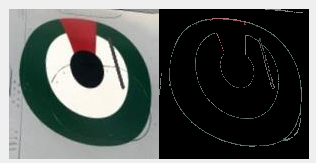

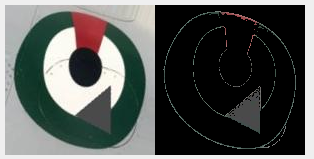

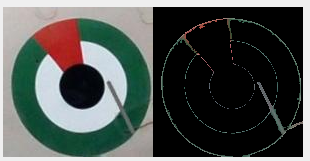

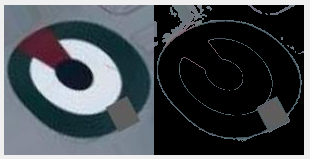

In [19]:
display(load_img('/home/mbzirc/Desktop/classification_model/result1.png'),
        load_img('/home/mbzirc/Desktop/classification_model/result2.png'),
        load_img('/home/mbzirc/Desktop/classification_model/result3.png'),
        load_img('/home/mbzirc/Desktop/classification_model/result4.png'))


## An Attempt of Defect Segmentation using Heatmaps 

In [20]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


1/1 [==============================] - 0s 123ms/step


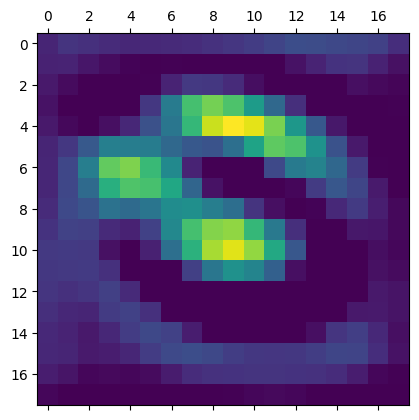

In [23]:
from keras.applications.vgg16 import preprocess_input
# Prepare image
img_size=(150,150)

last_conv_layer_name = 'block4_conv2'

img_array = preprocess_input(get_img_array(logo, size=img_size))

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


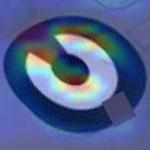

In [24]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(logo, heatmap)
